In [1]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [8]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

def GroqBot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}



In [9]:
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("GroqBot",GroqBot)

graph.add_edge(START,"GroqBot")
graph.add_edge("GroqBot",END)

graph_commp= graph.compile()


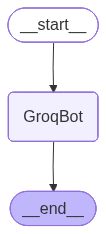

In [10]:
from IPython.display import Image, display
display(Image(graph_commp.get_graph().draw_mermaid_png()))

In [11]:
graph_commp.invoke({'messages':"Hi I am Phanindra"})

{'messages': [HumanMessage(content='Hi I am Phanindra', additional_kwargs={}, response_metadata={}, id='4336a563-a491-43bd-8568-07ee5de90da3'),
  AIMessage(content="Hello Phanindra! 👋\n\nIt's nice to meet you. What can I do for you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 14, 'total_tokens': 40, 'completion_time': 0.047272727, 'prompt_time': 0.001256081, 'queue_time': 0.253490889, 'total_time': 0.048528808}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a525c842-6872-4080-8419-951b176275d5-0', usage_metadata={'input_tokens': 14, 'output_tokens': 26, 'total_tokens': 40})]}

In [12]:
for events in graph_commp.stream({"messages":"I am Phani from India"}):
    print(events)

{'GroqBot': {'messages': [AIMessage(content="Namaste, Phani! 👋 \n\nIt's nice to meet you.  \n\nIs there anything I can help you with today? 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 15, 'total_tokens': 49, 'completion_time': 0.061818182, 'prompt_time': 0.001246301, 'queue_time': 0.253416198, 'total_time': 0.063064483}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b6af7930-9f8a-49aa-b6ba-aed2b2ca4ac4-0', usage_metadata={'input_tokens': 15, 'output_tokens': 34, 'total_tokens': 49})]}}
